**Caio Teles Cunha 2020006434** 

**Ivan Vilaça de Assis 2021421931**

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
plt.figure(figsize=(8, 8)) 

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [32]:
def genSmallWorld(N, Z, p):
  #Arestas concectando o nó aos seus Z vizinhos mais próximos
  shortcuts = int(p * ((N * Z) / 2))
  Z = Z//2
  G = nx.Graph()

  for i in range(0, N):
    G.add_node(i)

  for i in range(0, N):
    for k in range(1,Z+1):
      previous_index = (i - k) % N
      next_index = (i + k) % N
      G.add_edge(i, previous_index)
      G.add_edge(i, next_index)


  for i in range(0, shortcuts):
    randomNode1 = np.random.randint(0,N)
    randomNode2 = np.random.randint(0,N)
    G.add_edge(randomNode1, randomNode2)

  return G
        

In [33]:
def FindPathLengthsFromNode(graph, node):
  path_lengths = nx.shortest_path_length(graph, node)
  
  return path_lengths

In [34]:
def FindAllPathLengths(graph):
  list_of_all_path_lengths = []
  
  for i in list(graph.nodes):
    list_of_all_path_lengths.append(FindPathLengthsFromNode(graph, i))

  return list_of_all_path_lengths

In [35]:
def findAveragePathLength(graph):
  listOfLengths = FindAllPathLengths(graph)
  lengths = []

  for i in listOfLengths:
    lengths += list(i.values())

  averagePathLength = np.mean(lengths)

  return averagePathLength

In [36]:
def PlotHistogram(listOfAllPathLenghts):
  lengths = []
  
  # Extract the lengths
  for i in listOfAllPathLenghts:
    lengths += list(i.values())
  
  bins = np.arange(min(lengths), max(lengths) + 2) - 0.5

  # Plotting the histogram
  plt.hist(lengths, bins=bins, edgecolor='black')

  # Customize x-axis ticks to display as integers
  plt.xticks(np.arange(min(lengths), max(lengths) + 1, 10))
    
  # Adding labels and title
  plt.xlabel('Tamanho de comprimentos de caminhos')
  plt.ylabel('Frequência absoluta')
  plt.title('Histograma de comprimentos de caminhos')

  # Displaying the histogram
  plt.show()
  


Testando se as funções geram um histograma é constante

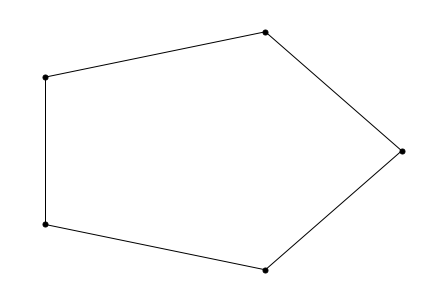

In [37]:
G1 = genSmallWorld(5,2,0.2)
nx.draw_circular(G1, node_color='black', node_size=25)
G1Lenghts = FindAllPathLengths(G1)
average = findAveragePathLength(G1)

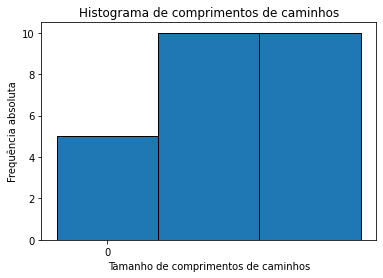

In [38]:
PlotHistogram(G1Lenghts)

####  2- Gere gráficos para 𝑁 = 1.000 e 𝑍 = 2 para 𝑝 = 0,02 e 𝑝 = 0,2; exiba os gráficos circulares e trace o histograma de comprimentos de caminho. Amplie o histograma; o quanto ele muda com p? Que valor de p você precisaria para obter “seis graus de separação”?

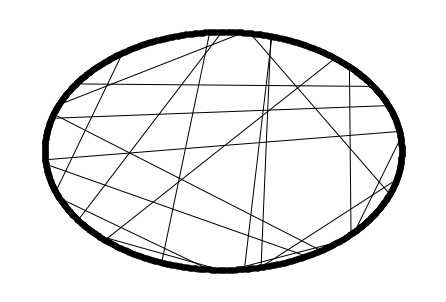

In [39]:
G2 = genSmallWorld(1000,2,0.02)
nx.draw_circular(G2, node_color='black', node_size=25)

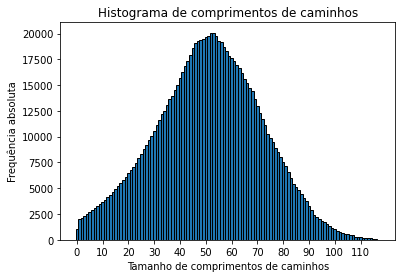

In [40]:
G2Lenghts = FindAllPathLengths(G2)
PlotHistogram(G2Lenghts)

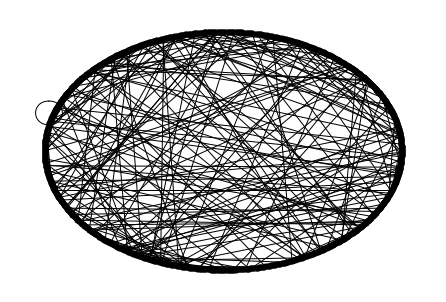

In [41]:
G3 = genSmallWorld(1000,2,0.2)
nx.draw_circular(G3, node_color='black', node_size=25)

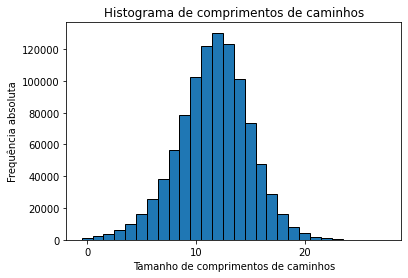

In [42]:
G3Lenghts = FindAllPathLengths(G3)
PlotHistogram(G3Lenghts)

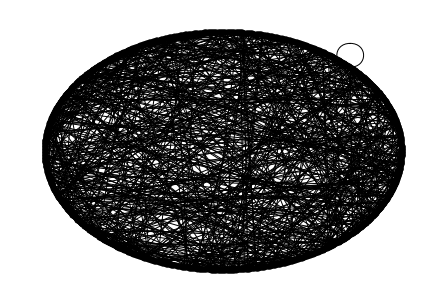

In [43]:
G4 = genSmallWorld(1000,2,0.7)
nx.draw_circular(G4, node_color='black', node_size=25)

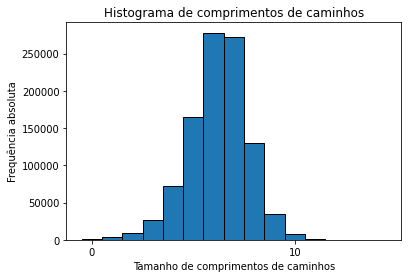

In [44]:
G4Lenghts = FindAllPathLengths(G4)
PlotHistogram(G4Lenghts)

Aumentando o p 10x como no exemplo, de 0.02 para 0.2, a quantidade de atalhos na rede aumenta muito, isso pode ser constatado olhando o gráfico circular dos 2 casos. Com o aumento dos atalhos, a distância entre os nós acaba mudando significativamente porque essas novas arestas aumentam a possibilidades de caminhos de um nó a outro, sendo que esses caminhos são menores como inferimos pelo seu próprio nome, *atalhos*.

Os atalhos diminuem as possibilidades de comprimento de caminhos, já que na segunda situção o maior comprimento foi de 25 enquanto na primeira foi acima de 120. 

Então, aparentemente, quanto mais aumentarmos o p, mais atalhos teremos e obteremos menores quantidades de caminhos, vamos "diminuindo" nosso histograma. Para obter os 6 graus de separação, precisamos que o 6 se torne nossa média no histograma. Pelos testes que fizemos com 𝑁 = 1.000 e 𝑍 = 2, isso deve ocorrer com *p entre 0,65 e 0,7*.

#### 3 - Aproximadamente quantas arestas longas existem neste sistema? Você esperaria flutuações nas distâncias?

Médias de comprimento de caminhos:
 [ 9.458   8.7104 10.5034  9.8518  8.7554  9.4614 10.4436  9.5488  9.0644
 10.3048]
Média das médias de comprimento de caminhos:  9.6102

Plot do último grafo:


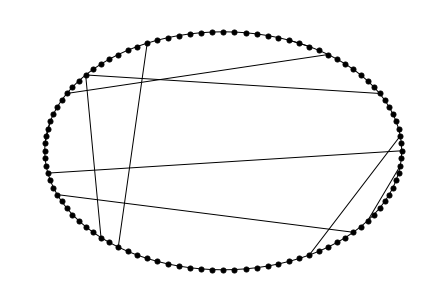

In [53]:
numOfSamples = 10
averagePathLengths = np.zeros(numOfSamples)

for i in range(numOfSamples):
  G5 = genSmallWorld(100,2,0.1)
  averagePathLengths[i] = findAveragePathLength(G5)

print('Médias de comprimento de caminhos:\n', averagePathLengths)
print('Média das médias de comprimento de caminhos: ', np.mean(averagePathLengths))

print('\nPlot do último grafo:')
nx.draw_circular(G5, node_color='black', node_size=25)

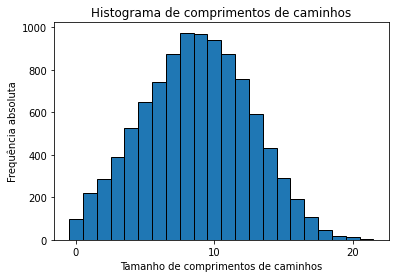

In [46]:
G5Lenghts = FindAllPathLengths(G5)
PlotHistogram(G5Lenghts)

Há aproximadamente 8 arestas longas no grafo. Essas arestas longas longas vão diminuir a distância entra alguns nós e como elas são aleatória esperavamos que houvesse essa flutuação nos caminhos.


#### Para visualizar melhor, gere valores de 𝑝 igualmente espaçados entre 10<sup>-3</sup> e 10<sup>3</sup>. Por que o gráfico é fixado em um para 𝑝 pequeno?

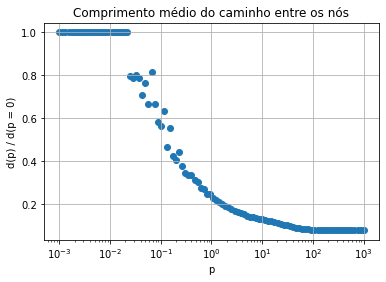

In [47]:
G6 = genSmallWorld(50,2,0)
meanPath_0 = findAveragePathLength(G6)

lenFun = []

# Usamos uma escala logaritma para o decaimento de p, já que L(p) decai rapidamente.
pValues = np.logspace(np.log10(0.001), np.log10(1000), 100)

for p in pValues:
  graph = genSmallWorld(50,2, p)
  lenFun.append(findAveragePathLength(graph) / meanPath_0) 

plt.scatter(pValues, lenFun)
plt.xscale('log')
plt.xlabel('p')
plt.ylabel('d(p) / d(p = 0)')
plt.title('Comprimento médio do caminho entre os nós')
plt.grid(True)
plt.show()

Com **p** muito pequeno nossa rede acaba não tendo muitos atalhos o que faz com que d(p) seja igual a d(0) resultando no valor 1. Quanto mais aumentamos **p**, mais atalhos vão surgindo na nossa rede e os caminhos entre os nós vão diminuindo o que por consequência diminui a média dos caminhos entre os nós e diminui o valor da função que estamos analisando: d(p) / d(0)

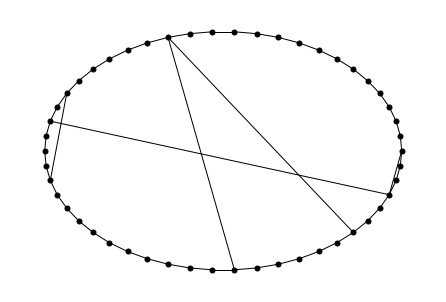

In [48]:
G6 = genSmallWorld(50,2,0.1)
nx.draw_circular(G6, node_color='black', node_size=25)

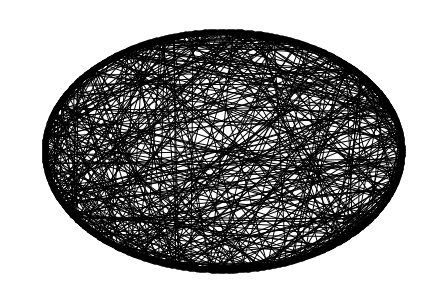

In [49]:
G7 = nx.watts_strogatz_graph(1000,10,0.1)
nx.draw_circular(G7, node_color='black', node_size=25)

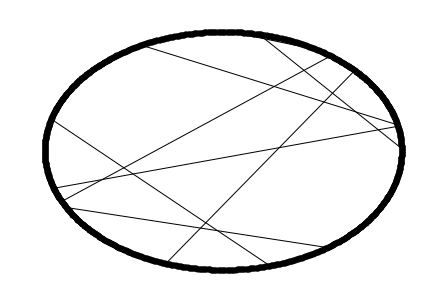

In [50]:
G8 = nx.watts_strogatz_graph(1000,10,0.001)
nx.draw_circular(G8, node_color='black', node_size=25)

#### Qual dos sistemas deles parece estatisticamente mais semelhante ao seu?

Este segundo com 𝑍 = 10, 𝑁 = 1.000 e p = 0.001 e o mais semelhante, já que a quantidade de atalho é parecida com a que geramos usando nosso algoritmo.

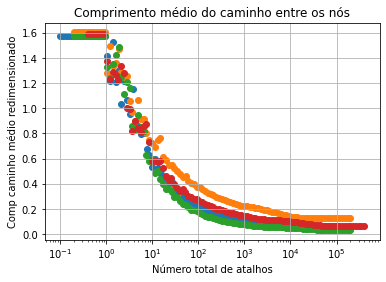

In [74]:
G6 = genSmallWorld(50,2,0)
meanPath_0 = findAveragePathLength(G6)
N = [100,200]
Z = [2,4]

avLenRed = []
shortcutTotal = []

# Usamos uma escala logaritma para o decaimento de p, já que L(p) decai rapidamente.
pValues = np.logspace(np.log10(0.001), np.log10(1000), 100)


for n in N:
  for z in Z:
    for p in pValues:
      graph = genSmallWorld(n,z,p)
      d = findAveragePathLength(graph)
      avLenRed.append((np.pi * z * d) / n) 
      shortcutTotal.append((p * n * z) / 2)

avLenRedN100Z2 = avLenRed[:100]
avLenRedN100Z4 = avLenRed[100:200]
avLenRedN200Z2 = avLenRed[200:300]
avLenRedN200Z4 = avLenRed[300:400]

shortcutTotalN100Z2 = shortcutTotal[:100]
shortcutTotalN100Z4 = shortcutTotal[100:200]
shortcutTotalN200Z2 = shortcutTotal[200:300]
shortcutTotalN200Z4 = shortcutTotal[300:400]


plt.scatter(shortcutTotalN100Z2, avLenRedN100Z2)
plt.scatter(shortcutTotalN100Z4, avLenRedN100Z4)
plt.scatter(shortcutTotalN200Z2, avLenRedN200Z2)
plt.scatter(shortcutTotalN200Z4, avLenRedN200Z4)
plt.xscale('log')
plt.xlabel('Número total de atalhos')
plt.ylabel('Comp caminho médio redimensionado')
plt.title('Comprimento médio do caminho entre os nós')
plt.grid(True)
plt.show()

In [3]:
# Escolhemos uma rede de passáros da família Ploceidae

df = pd.read_csv('aves-weaver-social.csv')
df.head()

,From,To,Weight
0,1,2,0
1,1,3,0
2,2,3,0
3,4,5,0
4,4,6,0


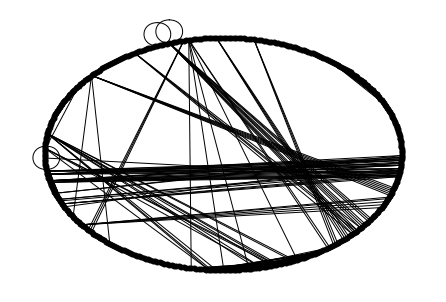

In [64]:
avesGraph = nx.from_pandas_edgelist(df,source="From",target="To", edge_attr="Weight")
nx.draw_circular(avesGraph, node_color='black', node_size=25)

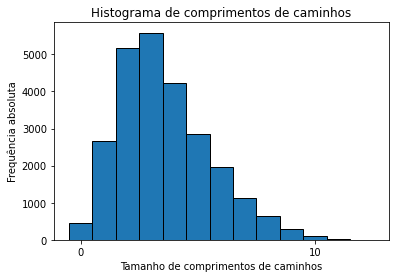

In [69]:
avesGraphLenghts = FindAllPathLengths(avesGraph)
PlotHistogram(avesGraphLenghts)

In [68]:
avesGraph_AvPathLen = findAveragePathLength(avesGraph)
print('O comprimento médio dos caminhos é: ', avesGraph_AvPathLen)

O comprimento médio dos caminhos é:  3.578318531203951


Nesta rede específico, a média dos caminhos acabou não ficando próximo da média 6. Mas foi menor porque ele apresenta uma quantidade grande de arestas longas/atalhos o que acaba diminuindo as distâncias.